# Document Layout Analysis Using Faster-RCNN

## About the network:
1. Paper on Faster-RCNN: https://arxiv.org/abs/1506.01497

2. Blog-1 on Faster-RCNN: https://towardsdatascience.com/faster-r-cnn-for-object-detection-a-technical-summary-474c5b857b46

3. Blog-2 on Faster-RCNN: https://towardsdatascience.com/faster-rcnn-object-detection-f865e5ed7fc4

# Table of Contents

### 1. Installation Instructions
### 2. Use trained Model for Document Layout Analysis
### 3. How to train using PRImA Layout Analysis Dataset

# Installation

- Run these commands

    - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

    - cd Monk_Object_Detection/3_mxrcnn/installation

- Select the right requirements file and run

    - cat requirements_cuda10.1.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
#! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
! cd Monk_Object_Detection/3_mxrcnn/installation && cat requirements_cuda10.1.txt | xargs -n 1 -L 1 pip install

# Use Already Trained Model for Demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from infer_base import *

In [3]:
#Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TZQSBiMDBrGhcT75AknTbofirSFXprt8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TZQSBiMDBrGhcT75AknTbofirSFXprt8" -O obj_dla_faster_rcnn_trained.zip && rm -rf /tmp/cookies.txt

In [5]:
! unzip -qq obj_dla_faster_rcnn_trained.zip

In [3]:
class_file = set_class_list("dla_fasterRCNN/classes.txt");

In [4]:
set_model_params(model_name="vgg16", model_path="dla_fasterRCNN/dla_fasterRCNN-vgg16.params");

In [5]:
set_hyper_params(gpus="0", batch_size=1);

In [6]:
set_img_preproc_params(img_short_side=300, img_long_side=500, mean=(196.45086004329943, 199.09071480252155, 197.07683846968297), std=(0.25779948968052024, 0.2550292865960972, 0.2553027154941914));

In [7]:
initialize_rpn_params();

In [8]:
initialize_rcnn_params();

In [9]:
sym = set_network();
mod = load_model(sym);

heading
 0.9513356685638428 [197.28582691720808, 544.982986129137, 2212.2780615821875, 1119.757036470632]
paragraph
 0.9944199919700623 [1271.7333091389332, 2150.005619375833, 2205.789511630536, 2908.1703240480856]
paragraph
 0.9883212447166443 [345.35555530757375, 1763.730590180017, 1255.150244798487, 2310.899052585461]
paragraph
 0.9819345474243164 [358.64189845823773, 2351.4274000610358, 1218.294188055503, 3047.184277392031]
paragraph
 0.9318755865097046 [1256.3407645398074, 1786.8670402890132, 2242.9950855933507, 2136.2417952115466]
['paragraph\n', 0.9944199919700623, [1271.7333091389332, 2150.005619375833, 2205.789511630536, 2908.1703240480856]]


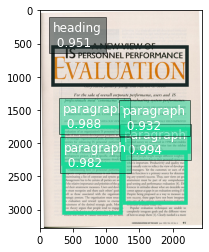

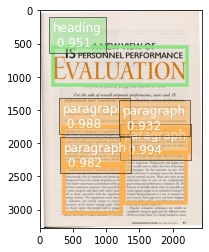

In [15]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("Test_Images/test1.jpg", mod);

image
 0.9818705320358276 [829.0903382827387, 926.2908137275249, 1506.0512650227345, 1895.7291926872065]
image
 0.9635408520698547 [208.35327811633303, 932.0222930777503, 865.9212195536102, 1784.845204988397]
paragraph
 0.9938613176345825 [1526.1538554421447, 1057.7524140143012, 2120.1676282474577, 1691.0806105314794]
paragraph
 0.9925198554992676 [1475.914042601362, 1788.2522272324209, 2080.0262022904362, 2512.1623455276117]
paragraph
 0.9915531277656555 [178.75247816161348, 2008.408822142143, 808.7958794785201, 2690.4970662038]
paragraph
 0.9900182485580444 [896.2594871988377, 1995.1510669207403, 1447.7003339433618, 2823.746218138596]
paragraph
 0.9797807931900024 [1582.4681319925287, 2519.911944606909, 2168.3375808916476, 3101.8660226779616]
paragraph
 0.9723654985427856 [154.47992000452805, 2701.4411712544575, 827.7555911929513, 3130.6269607380714]
paragraph
 0.7261314392089844 [923.5917363168122, 2642.591792917382, 1529.476354168632, 3049.8951681980266]
['paragraph\n', 0.993861317

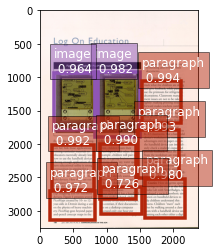

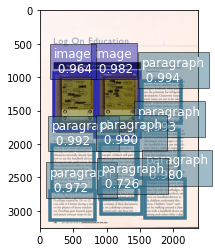

In [17]:
set_output_params(vis_thresh=0.7, vis=True)
Infer("Test_Images/test2.jpg", mod);

floating
 0.6780918836593628 [1268.4487378521903, 2055.549023459975, 2195.4414432798735, 2553.3838317231243]
heading
 0.6133703589439392 [570.52592090187, 118.57679635076978, 1655.4021867898823, 526.0053779222634]
heading
 0.5513576865196228 [653.2220583925617, 781.8052242569917, 1903.459687498981, 1081.932971464458]
image
 0.9938890933990479 [1250.931536361712, 994.7737936352438, 2244.38885983532, 1781.0505898773395]
image
 0.9915314316749573 [1227.126140399537, 2638.0748907492566, 2305.8483688671695, 3344.970526962242]
paragraph
 0.9838346242904663 [84.98929571532778, 1880.1188335108143, 1130.1359091203828, 2391.8589892312352]
paragraph
 0.9548238515853882 [58.75411153616127, 2645.851795725893, 1116.1604537846804, 3305.9257554997885]
paragraph
 0.9455330967903137 [162.21154730640814, 1191.868925431047, 1178.454704063943, 1550.735946528446]
paragraph
 0.5895626544952393 [78.41853681826431, 2373.775855184186, 1096.0022749125565, 2708.1085809484284]
['image\n', 0.9938890933990479, [1250

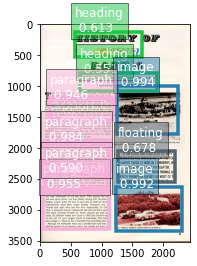

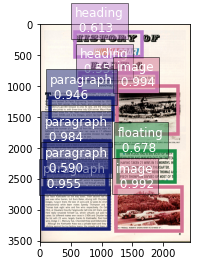

In [13]:
set_output_params(vis_thresh=0.5, vis=True)
Infer("Test_Images/test3.jpg", mod);

# Train Your Own Model

## Dataset Credits
- https://www.primaresearch.org/datasets/Layout_Analysis

In [ ]:
#Download Dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_" -O PRImA_Layout_Analysis_Dataset.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq PRImA_Layout_Analysis_Dataset.zip

# Data Preprocessing

### Library for Data Augmentation
Refer to https://github.com/albumentations-team/albumentations for more details

In [ ]:
! pip install albumentations

In [3]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import albumentations as A
import glob
import matplotlib.pyplot as plt
import xmltodict
import json
from tqdm.notebook import tqdm
from pycocotools.coco import COCO

In [15]:
root_dir = "PRImA Layout Analysis Dataset/";
img_dir = "Images/";
anno_dir = "XML/";
final_root_dir="Document_Layout_Analysis/" #Directory for jpeg and augmented images

In [10]:
if not os.path.exists(final_root_dir):
    os.makedirs(final_root_dir)

if not os.path.exists(final_root_dir+img_dir):
    os.makedirs(final_root_dir+img_dir)

## TIFF Image Format to JPEG Image Format

In [16]:
for name in glob.glob(root_dir+img_dir+'*.tif'):
    im = Image.open(name)
    name = str(name).rstrip(".tif")
    name = str(name).lstrip(root_dir)
    name = str(name).lstrip(img_dir)
    im.save(final_root_dir+ img_dir+ name + '.jpg', 'JPEG')

# Format Conversion and Data Augmentation

As most part of a document is text, there were far more paragraphs in the dataset than there were other labels such as tables or graphs. To handle this huge bias in the dataset, we augmented only those document images which had one of these minority labels in them. For example, if the document only had paragraphs and images, then we didn’t augment it. But if it had tables, charts, graphs or any other minority label, we augmented that image by many folds. This process helped in reducing the bias in the dataset by around 25%. This selection and augmentation has been done during the format conversion from VOC to Monk Format. 

## Given Format- VOC Format

### Dataset Directory Structure

    ./PRImA Layout Analysis Dataset/ (root_dir)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------Annotations (anno_dir)
          |              |
          |              |------------------img1.xml
          |              |------------------img2.xml
          |              |------------------.........(and so on)
          


## Intermediatory Format- Monk Format

### Dataset Directory Structure

    ./Document_Layout_Analysis/ (final_root_dir)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
### Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

## Required Format- COCO Format

### Dataset Directory Structure

    ./ (root_dir)
          |
          |------Document_Layout_Analysis (coco_dir) 
          |         |
          |         |---Images (img_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations (anno_dir)
          |         |----|
          |              |--------------------instances_Images.json 
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order

In [18]:
files = os.listdir(root_dir + anno_dir);

In [19]:
combined = [];

### Data Augmentation Function

In [20]:
def augmentData(fname, boxes):
    image = cv2.imread(final_root_dir+img_dir+fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
    transform = A.Compose([
        A.IAAPerspective(p=0.7),   
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=5, p=0.5),
        A.IAAAdditiveGaussianNoise(),
        A.ChannelShuffle(),
        A.RandomBrightnessContrast(),
        A.RGBShift(p=0.8),
        A.HueSaturationValue(p=0.8)
        ], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.2))
    
    for i in range(1, 9):
        label=""
        transformed = transform(image=image, bboxes=boxes)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        #print(transformed_bboxes)
        flag=False
        for box in transformed_bboxes:
            x_min, y_min, x_max, y_max, class_name = box
            if(xmax<=xmin or ymax<=ymin):
                flag=True
                break
            label+= str(int(x_min))+' '+str(int(y_min))+' '+str(int(x_max))+' '+str(int(y_max))+' '+class_name+' '
                        
        if(flag):
            continue
        cv2.imwrite(final_root_dir+img_dir+str(i)+fname, transformed_image)
        label=label[:-1]
        combined.append([str(i) + fname, label])


## VOC to Monk Format Conversion
Applying Data Augmentation only on those images which contain atleast 1 minority class so as to reduce bias in the dataset

In [21]:
#label generation for csv
for i in tqdm(range(len(files))):
    box=[];
    augment=False;
    annoFile = root_dir + anno_dir + files[i];
    f = open(annoFile, 'r');
    my_xml = f.read();
    anno= dict(dict(dict(xmltodict.parse(my_xml))['PcGts'])['Page'])
    fname=""
    for j in range(len(files[i])):
        if((files[i][j])>='0' and files[i][j]<='9'):
            fname+=files[i][j];
    fname+=".jpg"
    image = cv2.imread(final_root_dir+img_dir+fname)
    height, width = image.shape[:2]    
    label_str = ""
    for key in anno.keys():
        if(key=='@imageFilename' or key=='@imageWidth' or key=='@imageHeight'):
            continue
        if(key=="TextRegion"):
            if(type(anno["TextRegion"]) == list):
                for j in range(len(anno["TextRegion"])):
                    text=anno["TextRegion"][j]
                    xmin=width
                    ymin=height
                    xmax=0
                    ymax=0
                    if(text["Coords"]):
                        if(text["Coords"]["Point"]):
                            for k in range(len(text["Coords"]["Point"])):
                                coordinates=anno["TextRegion"][j]["Coords"]["Point"][k]
                                xmin= min(xmin, int(coordinates['@x']));
                                ymin= min(ymin, int(coordinates['@y']));
                                xmax= min(max(xmax, int(coordinates['@x'])), width);
                                ymax= min(max(ymax, int(coordinates['@y'])), height);
                            if('@type' in text.keys()):    
                                label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+text['@type']+' '
                                if(xmax<=xmin or ymax<=ymin):
                                    continue
                                tbox=[];
                                tbox.append(xmin)
                                tbox.append(ymin)
                                tbox.append(xmax)
                                tbox.append(ymax)
                                tbox.append(text['@type'])
                                box.append(tbox)
            else:
                text=anno["TextRegion"]
                xmin=width
                ymin=height
                xmax=0
                ymax=0
                if(text["Coords"]):
                    if(text["Coords"]["Point"]):
                        for k in range(len(text["Coords"]["Point"])):
                            coordinates=anno["TextRegion"]["Coords"]["Point"][k]
                            xmin= min(xmin, int(coordinates['@x']));
                            ymin= min(ymin, int(coordinates['@y']));
                            xmax= min(max(xmax, int(coordinates['@x'])), width);
                            ymax= min(max(ymax, int(coordinates['@y'])), height);
                        if('@type' in text.keys()):    
                            label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+text['@type']+' '
                            if(xmax<=xmin or ymax<=ymin):
                                continue
                            tbox=[];
                            tbox.append(xmin)
                            tbox.append(ymin)
                            tbox.append(xmax)
                            tbox.append(ymax)
                            tbox.append(text['@type'])
                            box.append(tbox)
        
        else:
            val=""
            if(key=='GraphicRegion'):
                val="graphics"
                augment=True
            elif(key=='ImageRegion'):
                val="image"
            elif(key=='NoiseRegion'):
                val="noise"
                augment=True
            elif(key=='ChartRegion'):
                val="chart"
                augment=True
            elif(key=='TableRegion'):
                val="table"
                augment=True
            elif(key=='SeparatorRegion'):
                val="separator"
            elif(key=='MathsRegion'):
                val="maths"
                augment=True
            elif(key=='LineDrawingRegion'):
                val="linedrawing"
                augment=True
            else:
                val="frame"
                augment=True

            
            if(type(anno[key]) == list):
                for j in range(len(anno[key])):
                    text=anno[key][j]
                    xmin=width
                    ymin=height
                    xmax=0
                    ymax=0
                    if(text["Coords"]):
                        if(text["Coords"]["Point"]):
                            for k in range(len(text["Coords"]["Point"])):
                                coordinates=anno[key][j]["Coords"]["Point"][k]
                                xmin= min(xmin, int(coordinates['@x']));
                                ymin= min(ymin, int(coordinates['@y']));
                                xmax= min(max(xmax, int(coordinates['@x'])), width);
                                ymax= min(max(ymax, int(coordinates['@y'])), height);
                        label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+ val +' '
                        if(xmax<=xmin or ymax<=ymin):
                            continue
                        tbox=[];
                        tbox.append(xmin)
                        tbox.append(ymin)
                        tbox.append(xmax)
                        tbox.append(ymax)
                        tbox.append(val)
                        box.append(tbox)
            else:
                text=anno[key]
                xmin=width
                ymin=height
                xmax=0
                ymax=0
                if(text["Coords"]):
                    if(text["Coords"]["Point"]):
                        for k in range(len(text["Coords"]["Point"])):
                            coordinates=anno[key]["Coords"]["Point"][k]
                            xmin= min(xmin, int(coordinates['@x']));
                            ymin= min(ymin, int(coordinates['@y']));
                            xmax= min(max(xmax, int(coordinates['@x'])), width);
                            ymax= min(max(ymax, int(coordinates['@y'])), height);  
                        label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+val+' '
                        if(xmax<=xmin or ymax<=ymin):
                            continue
                        tbox=[];
                        tbox.append(xmin)
                        tbox.append(ymin)
                        tbox.append(xmax)
                        tbox.append(ymax)
                        tbox.append(val)
                        box.append(tbox)

    label_str=label_str[:-1]
    combined.append([fname, label_str])

    if(augment):
        augmentData(fname, box)
        

In [22]:
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
df.to_csv(final_root_dir + "/train_labels.csv", index=False);

## Monk to COCO Format

In [ ]:
import os
import numpy as np 
import cv2
import dicttoxml
import xml.etree.ElementTree as ET
from xml.dom.minidom import parseString
from tqdm import tqdm
import shutil
import json
import pandas as pd

In [2]:
root = "Document_Layout_Analysis";
img_dir = "Images/";
anno_file = "train_labels.csv";

In [3]:
dataset_path = root;
images_folder = root + "/" + img_dir;
annotations_path = root + "/annotations/";

In [4]:
if not os.path.isdir(annotations_path):
    os.mkdir(annotations_path)
    
input_images_folder = images_folder;
input_annotations_path = root + "/" + anno_file;

In [5]:
output_dataset_path = root;
output_image_folder = input_images_folder;
output_annotation_folder = annotations_path;

tmp = img_dir.replace("/", "");
output_annotation_file = output_annotation_folder + "/instances_" + tmp + ".json";
output_classes_file = output_annotation_folder + "/classes.txt";

In [6]:
if not os.path.isdir(output_annotation_folder):
    os.mkdir(output_annotation_folder);

In [7]:
df = pd.read_csv(input_annotations_path);
columns = df.columns
delimiter = " ";

In [8]:
list_dict = [];
anno = [];
for i in range(len(df)):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    for j in range(len(tmp)//5):
        label = tmp[j*5+4];
        if(label not in anno):
            anno.append(label);
    anno = sorted(anno)
    
for i in tqdm(range(len(anno))):
    tmp = {};
    tmp["supercategory"] = "master";
    tmp["id"] = i;
    tmp["name"] = anno[i];
    list_dict.append(tmp);

anno_f = open(output_classes_file, 'w');
for i in range(len(anno)):
    anno_f.write(anno[i] + "\n");
anno_f.close();

100%|██████████| 18/18 [00:00<00:00, 104857.60it/s]


In [9]:
coco_data = {};
coco_data["type"] = "instances";
coco_data["images"] = [];
coco_data["annotations"] = [];
coco_data["categories"] = list_dict;
image_id = 0;
annotation_id = 0;


for i in tqdm(range(len(df))):
    img_name = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(delimiter);
    image_in_path = input_images_folder + "/" + img_name;
    img = cv2.imread(image_in_path, 1);
    h, w, c = img.shape;

    images_tmp = {};
    images_tmp["file_name"] = img_name;
    images_tmp["height"] = h;
    images_tmp["width"] = w;
    images_tmp["id"] = image_id;
    coco_data["images"].append(images_tmp);
    

    for j in range(len(tmp)//5):
        x1 = int(tmp[j*5+0]);
        y1 = int(tmp[j*5+1]);
        x2 = int(tmp[j*5+2]);
        y2 = int(tmp[j*5+3]);
        label = tmp[j*5+4];
        annotations_tmp = {};
        annotations_tmp["id"] = annotation_id;
        annotation_id += 1;
        annotations_tmp["image_id"] = image_id;
        annotations_tmp["segmentation"] = [];
        annotations_tmp["ignore"] = 0;
        annotations_tmp["area"] = (x2-x1)*(y2-y1);
        annotations_tmp["iscrowd"] = 0;
        annotations_tmp["bbox"] = [x1, y1, x2-x1, y2-y1];
        annotations_tmp["category_id"] = anno.index(label);

        coco_data["annotations"].append(annotations_tmp)
    image_id += 1;

outfile =  open(output_annotation_file, 'w');
json_str = json.dumps(coco_data, indent=4);
outfile.write(json_str);
outfile.close();

100%|██████████| 3059/3059 [05:54<00:00,  8.63it/s]


### Function to get mean and standard deviation of dataset

In [ ]:
def normalize():
    channel_sum = np.zeros(3)
    channel_sum_squared = np.zeros(3)
    num_pixels=0
    count=0
    for file in files:
        file_path=final_root_dir+img_dir+file
        img=cv2.imread(file_path)
        img= img/255.
        num_pixels += (img.size/3)
        channel_sum += np.sum(img, axis=(0, 1))
        channel_sum_squared += np.sum(np.square(img), axis=(0, 1))

    mean = channel_sum / num_pixels
    std = np.sqrt((channel_sum_squared/num_pixels) - mean**2)
    
    #bgr to rgb conversion
    rgb_mean = list(mean)[::-1]
    rgb_std = list(std)[::-1]
    return rgb_mean, rgb_std

In [ ]:
img_dir = "Images/";
final_root_dir="Document_Layout_Analysis/"
files = os.listdir(final_root_dir + img_dir);
mean, std = normalize()
mean=[x*255 for x in mean]
print(mean)
print(std)

In [ ]:
#[196.45086004329943, 199.09071480252155, 197.07683846968297]
#[0.25779948968052024, 0.2550292865960972, 0.2553027154941914]

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from train_base import *

In [3]:
# Dataset params
root_dir = "./";
coco_dir = "Document_Layout_Analysis";
img_dir = "Images";

In [4]:
set_dataset_params(root_dir=root_dir, coco_dir=coco_dir, imageset=img_dir);

### Available models
    vgg16
    resnet50
    resnet101

In [5]:
# Model Type
set_model_params(model_name="vgg16");

In [6]:
#Hyperparameters
set_hyper_params(gpus="0", lr=0.003, lr_decay_epoch='20', epochs=30, batch_size=8);

In [7]:
set_output_params(log_interval=500, save_prefix="model_vgg16");

In [8]:
#Preprocessing image parameters(mean and std calculated in preprocessing notebook)
set_img_preproc_params(img_short_side=300, img_long_side=500, mean=(196.45086004329943, 199.09071480252155, 197.07683846968297), std=(0.25779948968052024, 0.2550292865960972, 0.2553027154941914));

In [9]:
#Initializing Parameters
initialize_rpn_params();
initialize_rcnn_params();

In [10]:
#Removing cache if any

In [11]:
if os.path.isdir("./cache/"):
    os.system("rm -r ./cache/")

In [12]:
#loading dataset
roidb = set_dataset();

INFO:root:computing cache ./cache/coco_Images_roidb.pkl


loading annotations into memory...
Done (t=0.47s)
creating index...
index created!


INFO:root:saving cache ./cache/coco_Images_roidb.pkl
INFO:root:coco_Images num_images 3059
INFO:root:filter roidb: 3059 -> 3059
INFO:root:coco_Images append flipped images to roidb


In [13]:
#loading model
sym = set_network();

In [ ]:
train(sym, roidb);

# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/")
sys.path.append("Monk_Object_Detection/3_mxrcnn/lib/mx-rcnn")

In [2]:
from infer_base import *

In [3]:
class_file = set_class_list("./Document_Layout_Analysis/annotations/classes.txt");

In [4]:
#Model - Select the model as per number of iterations it has been trained for
set_model_params(model_name="vgg16", model_path="trained_model/model_vgg16-0030.params");

In [6]:
set_hyper_params(gpus="0", batch_size=1);

In [7]:
set_img_preproc_params(img_short_side=300, img_long_side=500, mean=(196.45086004329943, 199.09071480252155, 197.07683846968297), std=(0.25779948968052024, 0.2550292865960972, 0.2553027154941914));

In [8]:
initialize_rpn_params();

In [9]:
initialize_rcnn_params();

In [10]:
sym = set_network();
mod = load_model(sym);

heading
 0.9513356685638428 [197.28582691720808, 544.982986129137, 2212.2780615821875, 1119.757036470632]
paragraph
 0.9944199919700623 [1271.7333091389332, 2150.005619375833, 2205.789511630536, 2908.1703240480856]
paragraph
 0.9883212447166443 [345.35555530757375, 1763.730590180017, 1255.150244798487, 2310.899052585461]
paragraph
 0.9819345474243164 [358.64189845823773, 2351.4274000610358, 1218.294188055503, 3047.184277392031]
paragraph
 0.9318755865097046 [1256.3407645398074, 1786.8670402890132, 2242.9950855933507, 2136.2417952115466]
['paragraph\n', 0.9944199919700623, [1271.7333091389332, 2150.005619375833, 2205.789511630536, 2908.1703240480856]]


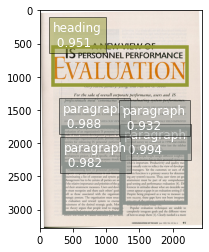

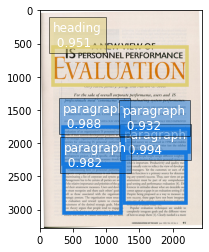

In [12]:
set_output_params(vis_thresh=0.9, vis=True)
Infer("PRImA_Layout_Analysis_Dataset/Test_Images/test1.jpg", mod);

image
 0.9818705320358276 [829.0903382827387, 926.2908137275249, 1506.0512650227345, 1895.7291926872065]
image
 0.9635408520698547 [208.35327811633303, 932.0222930777503, 865.9212195536102, 1784.845204988397]
paragraph
 0.9938613176345825 [1526.1538554421447, 1057.7524140143012, 2120.1676282474577, 1691.0806105314794]
paragraph
 0.9925198554992676 [1475.914042601362, 1788.2522272324209, 2080.0262022904362, 2512.1623455276117]
paragraph
 0.9915531277656555 [178.75247816161348, 2008.408822142143, 808.7958794785201, 2690.4970662038]
paragraph
 0.9900182485580444 [896.2594871988377, 1995.1510669207403, 1447.7003339433618, 2823.746218138596]
paragraph
 0.9797807931900024 [1582.4681319925287, 2519.911944606909, 2168.3375808916476, 3101.8660226779616]
paragraph
 0.9723654985427856 [154.47992000452805, 2701.4411712544575, 827.7555911929513, 3130.6269607380714]
paragraph
 0.7261314392089844 [923.5917363168122, 2642.591792917382, 1529.476354168632, 3049.8951681980266]
['paragraph\n', 0.993861317

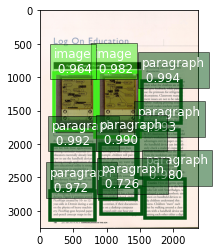

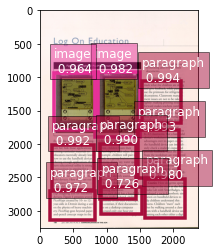

In [14]:
set_output_params(vis_thresh=0.7, vis=True)
Infer("PRImA_Layout_Analysis_Dataset/Test_Images/test2.jpg", mod);

floating
 0.6780918836593628 [1268.4487378521903, 2055.5491471070272, 2195.4414432798735, 2553.3838317231243]
heading
 0.6133701205253601 [570.52592090187, 118.57678089488829, 1655.4021867898823, 526.0053779222634]
heading
 0.5513577461242676 [653.2220583925617, 781.8052242569917, 1903.459687498981, 1081.932971464458]
image
 0.9938890933990479 [1250.931536361712, 994.7737936352438, 2244.38885983532, 1781.0505898773395]
image
 0.9915314316749573 [1227.126140399537, 2638.0748907492566, 2305.8483688671695, 3344.970526962242]
paragraph
 0.9838346242904663 [84.98929571532778, 1880.1188335108143, 1130.1359091203828, 2391.8589892312352]
paragraph
 0.9548238515853882 [58.75411153616127, 2645.851795725893, 1116.1604537846804, 3305.9257554997885]
paragraph
 0.9455329775810242 [162.21145457111922, 1191.868925431047, 1178.454704063943, 1550.735946528446]
paragraph
 0.5895621180534363 [78.41853681826431, 2373.775855184186, 1096.0022749125565, 2708.1085809484284]
['image\n', 0.9938890933990479, [125

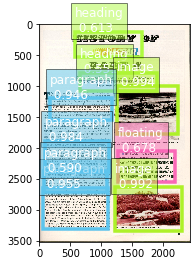

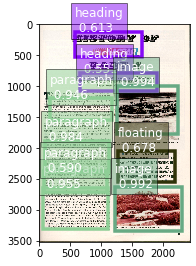

In [18]:
set_output_params(vis_thresh=0.5, vis=True)
Infer("PRImA_Layout_Analysis_Dataset/Test_Images/test3.jpg", mod);

### Inference
Faster-RCNN detected bounding boxes with very high confidence, but it missed some of the important regions, such as footer in the 1st example, heading in the 2nd example and drop capital in the 3rd. If we decrease the threshold confidence for getting the missing boxes, it produces a lot of random boxes with no clarity of what it represents.